# Ядерный метод опорных векторов (Kernel Support Vector Machine)

In [1]:
import numpy as np

## Основная идея
**Kernel SVM** (Support Vector Machine) и обычные SVM - это в основном один и тот же алгоритм, просто с различными ядрами. Однако, когда говорят о "SVM" без указания конкретного ядра, это обычно относится к линейному SVM.

Kernel SVM предоставляет следующие преимущества перед линейным SVM:
- **Работа с нелинейными данными**
Kernel SVM может эффективно обрабатывать нелинейные данные, позволяя проводить нелинейные преобразования признаков.

- **Большая гибкость**
Использование различных ядер (например, RBF, полиномиальные) делает Kernel SVM более гибким и способным к адаптации к различным формам данных.

- **Способность к более сложным разделяющим гиперплоскостям**
Ядерные методы позволяют строить более сложные разделяющие гиперплоскости, что полезно в случае сложных зависимостей между классами.

In [2]:
# создаем тестовый и обучающий набор раковых опухолей
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer_info = load_breast_cancer()
canser_data = cancer_info.data
canser_tagret = cancer_info.target

X_train, X_test, y_train, y_test = train_test_split(canser_data, canser_tagret)

In [3]:
from sklearn.svm import LinearSVC  # линейный SVM для классификации 

In [4]:
lin_svm = LinearSVC(random_state=0).fit(X_train, y_train)

print(f'Правильность на обучающей выборке: {lin_svm.score(X_train, y_train):.3f}')
print(f'Правильность на тестовой выборке: {lin_svm.score(X_test, y_test):.3f}')

Правильность на обучающей выборке: 0.918
Правильность на тестовой выборке: 0.902


C:\Users\dermi\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### НО если данные окажутся линейно не  разделимыми, то линейная модель нам не поможет

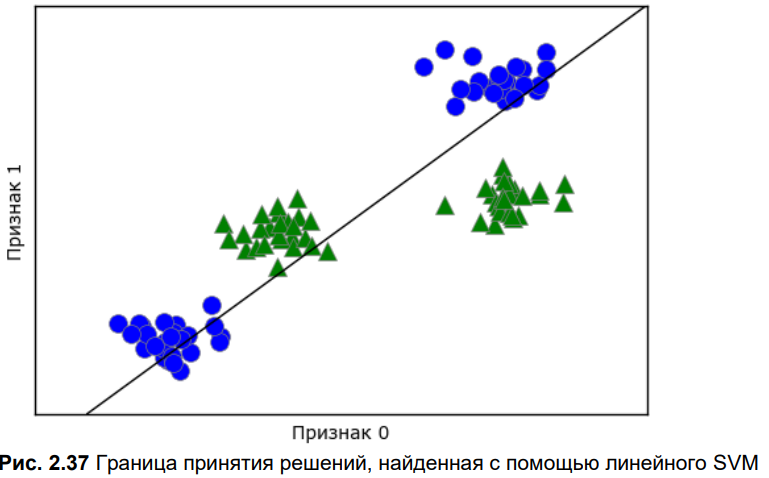

## Как классифицировать тогда? 

На помощь приходит добавление нелинейного признака, чтобы повысить размерность пространства и уже можно было бы провести линейную плоскость (или гиперблоскость) для разделения классов. 

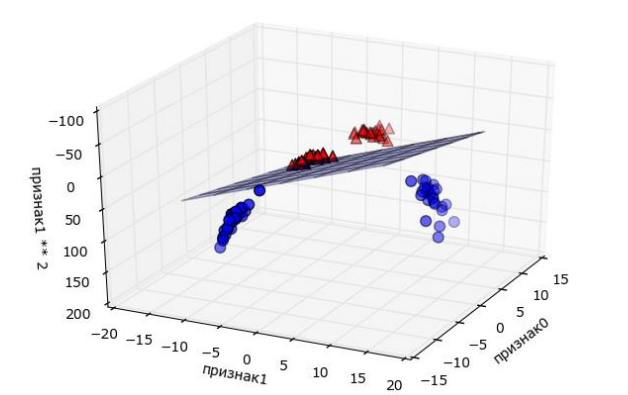

Поместить данные в высокоразмерное прастранство нам поможет так называемый **"ядерный трюк"** (kernel trick) и он 
непосредственно вычисляет евклидовы расстояния (более точно, скалярные произведения точек данных), чтобы получить расширенное пространство признаков без фактического добавления новых признаков.
Существуют два способа поместить данные в высокоразмерноепространство, которые чаще всего используются методом опорных векторов: **полиномиальное ядро**, которое вычисляет все возможные полиномиальные комбинации исходных признаков до определенной степени, и ядро **RBF** (радиальная базисная функция), также известное *как гауссовское ядро*.

## Принцип работы 

- **Нахождение оптимальной разделяющей гиперплоскости**

SVM ищет гиперплоскость, которая максимально отделяет классы в пространстве признаков.

- **Выбор опорных векторов**

Опорные векторы - это точки данных, которые находятся ближе всего к разделяющей гиперплоскости. Оптимизация SVM фокусируется на эти точки.

- **Использование ядер**

SVM может использовать ядерные функции для преобразования данных в более высокоразмерное пространство, где более сложные разделяющие гиперплоскости могут быть построены. Ядра позволяют алгоритму работать с нелинейными зависимостями.

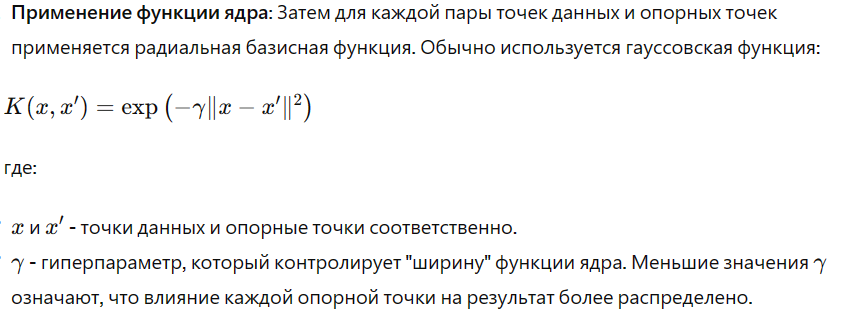

## ПАРАМЕТРЫ
- Параметр **gamma**  регулирует ширину гауссовского ядра. Параметр gamma
задает масштаб расстояний между точками. 
- Параметр **С** представляет собой параметр регуляризации, аналогичный тому, что использовался в линейных моделях.

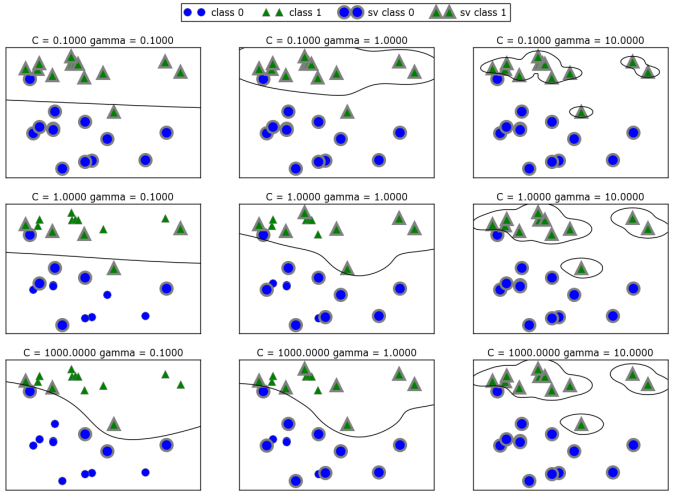

In [5]:
from sklearn.svm import SVC

In [6]:
kernel_svc = SVC(C=10000, gamma=0.000001).fit(X_train, y_train)

print(f'Правильность на обучающей выборке: {kernel_svc.score(X_train, y_train):.2f}')
print(f'Правильность на тестовой выборке: {kernel_svc.score(X_test, y_test):.2f}')

Правильность на обучающей выборке: 0.98
Правильность на тестовой выборке: 0.91


## ВАЖНО! Перед обучением модели МАСШТАБИРОВАТЬ данные!

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Применение того же масштабирования к тестовому набору
X_test_scaled = scaler.transform(X_test)

In [8]:
kernel_svc_scaled = SVC().fit(X_train_scaled, y_train)

print(f'Правильность на обучающей выборке: {kernel_svc_scaled.score(X_train_scaled, y_train):.2f}')
print(f'Правильность на тестовой выборке: {kernel_svc_scaled.score(X_test_scaled, y_test):.2f}')

print('\nРезультат стал намного лучше, поэтому важно МАСШТАБИРОВАТЬ признаки перед обучением!')

Правильность на обучающей выборке: 0.98
Правильность на тестовой выборке: 0.98

Результат стал намного лучше, поэтому важно МАСШТАБИРОВАТЬ признаки перед обучением!


## КАК ИТОГ

**Ядерный метод опорных векторов** – это модели, обладающие мощной 
прогнозной силой и хорошо работающие на различных наборах данных. 
SVM позволяет строить сложные решающие границы, даже если данные 
содержат лишь несколько признаков. Они хорошо работают на 
низкоразмерных и высокоразмерных данных (то есть когда у нас мало 
или, наоборот, много признаков), однако плохо масштабируются с 
ростом объема данных. Запуск SVM на наборе данных объемом 10000 
наблюдений не составляет проблем, однако работа с наборами данных 
объемом 100000 наблюдений и больше может стать сложной задачей с 
точки зрения времени вычислений и использования памяти.

Другим недостатком является то, что SVM требует тщательной
предварительной обработки данных и настройки параметров. Именно 
поэтому сейчас многие специалисты в различных сферах вместо SVM
используют модели на основе дерева, например, случайные леса или 
градиентный бустинг (который практически не требуют 
предварительную обработки данных). 

Кроме того, модели SVM 
трудноисследуемы, тяжело понять, почему был сделан именно такой
прогноз и довольно сложно объяснить модель неспециалисту.
Однако все же стоит попробовать SVM, особенно в тех случаях, когда
все ваши признаки имеют одинаковые единицы измерения (например, 
все признаки являются интенсивностями пикселей) и измерены в одном 
и том же масштабе.